# An√°lisis de Fourier en Acci√≥n: De las Matem√°ticas a las Telecomunicaciones Modernas

**Dirigido a:** Estudiantes de Ingenier√≠a en Sistemas de An√°lisis Matem√°tico III.

**Objetivo:** Este cuaderno busca desmitificar las Series de Fourier, demostrando que no son solo un concepto abstracto, sino el pilar fundamental sobre el que se construyen las tecnolog√≠as de comunicaci√≥n que usamos a diario (Wi-Fi, 4G/5G, radio digital). A trav√©s de un ejemplo pr√°ctico de modulaci√≥n digital, veremos c√≥mo los ingenieros utilizan estas herramientas para convertir datos (bits) en se√±ales que pueden viajar por el aire. Pasaremos de la teor√≠a matem√°tica a una simulaci√≥n funcional, tocando conceptos clave de la **capa f√≠sica** de los sistemas de comunicaci√≥n.

## Introducci√≥n: ¬øPor Qu√© Estudiar Series de Fourier en Ingenier√≠a en Sistemas?

Toda se√±al compleja, ya sea el sonido de una guitarra, una imagen digital o una transmisi√≥n de datos por Wi-Fi, puede ser descompuesta en una suma de ondas sinusoidales simples (senos y cosenos). Esta es la idea central detr√°s del **An√°lisis de Fourier**.

Para un Ingeniero en Sistemas, esto es crucial. Si podemos entender una se√±al como una "receta" de componentes simples, podemos:

1.  **Transmitirla eficientemente:** Enviamos ondas sinusoidales (llamadas **portadoras**) a las que les modificamos alguna caracter√≠stica (amplitud, fase o frecuencia) para que "lleven" informaci√≥n. Esto es la **modulaci√≥n**.
2.  **Filtrarla:** Eliminar ruidos o interferencias que se encuentran en frecuencias no deseadas.
3.  **Comprimirla:** Descartar componentes de frecuencia que no son importantes para reducir el tama√±o de los datos (el principio detr√°s de MP3 o JPEG).
4.  **Analizarla:** Usar la **Transformada R√°pida de Fourier (FFT)**, un algoritmo fundamental, para ver el espectro de una se√±al y entender c√≥mo se distribuye su energ√≠a en frecuencia.

En este cuaderno, nos centraremos en el primer punto, la modulaci√≥n, el lenguaje de las telecomunicaciones.

## Parte 1. El Concepto Fundamental: Modulaci√≥n Digital QPSK

La **modulaci√≥n** es el proceso de "montar" informaci√≥n digital (bits: 0s y 1s) sobre una onda anal√≥gica. La onda base es una simple sinusoide definida por:

$$s(t) = A \cdot \cos(2\pi f t + \phi)$$

Donde:
* $A$ es la **Amplitud** (qu√© tan "alta" es la onda).
* $f$ es la **Frecuencia** (qu√© tan "r√°pido" oscila).
* $\phi$ es la **Fase** (el desplazamiento inicial).

Al variar uno de estos par√°metros seg√∫n los bits que queremos enviar, estamos modulando la se√±al.

**QPSK (Quadrature Phase Shift Keying)** es una t√©cnica muy eficiente porque codifica **2 bits** de informaci√≥n en cada "s√≠mbolo" o cambio de la se√±al. Lo hace variando la fase ($\phi$) de la portadora en cuatro valores posibles, cada uno representando un par de bits.

### 1.1. Configuraci√≥n del Entorno y Par√°metros

Primero, importamos las librer√≠as y definimos los par√°metros b√°sicos de nuestra simulaci√≥n.

* `fs`: **Frecuencia de muestreo**. Seg√∫n el **Teorema de Nyquist**, debe ser al menos el doble de la frecuencia m√°xima de la se√±al para poder reconstruirla sin p√©rdidas. Usaremos un valor alto para una buena resoluci√≥n.
* `f`: **Frecuencia de la onda portadora**.
* `t_simbolo`: **Duraci√≥n** de cada s√≠mbolo (cada par de bits).

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from scipy.fft import fft, fftfreq

# --- Par√°metros B√°sicos de la Simulaci√≥n ---
fs = 1000  # Frecuencia de muestreo (Hz)
f = 5      # Frecuencia de la portadora (Hz)
t_simbolo = 1.0  # Duraci√≥n de cada s√≠mbolo (s)
n_muestras_por_simbolo = int(t_simbolo * fs)

### 1.2. La "Traducci√≥n": Tabla de S√≠mbolos QPSK

Creamos un "diccionario" que traduce cada posible par de bits a un cambio de fase espec√≠fico. Las fases est√°n separadas por 90¬∞ ($\pi/2$ radianes) para maximizar la diferencia entre ellas y facilitar su posterior detecci√≥n.

In [ ]:
# --- Tabla de S√≠mbolos QPSK (2 bits por s√≠mbolo) ---
# Mapeo: "Bits" -> Fase en radianes (y grados para claridad)
tabla_simbolos = {
    "00": 0,                # 0¬∞
    "01": np.pi / 2,        # 90¬∞
    "11": np.pi,            # 180¬∞
    "10": 3 * np.pi / 2     # 270¬∞
}

### 1.3. Generaci√≥n de la Se√±al Modulada

Ahora, tomamos un mensaje binario y lo convertimos en una se√±al anal√≥gica. Para cada par de bits del mensaje, generamos una onda coseno con la fase correspondiente y las concatenamos para formar la se√±al final.

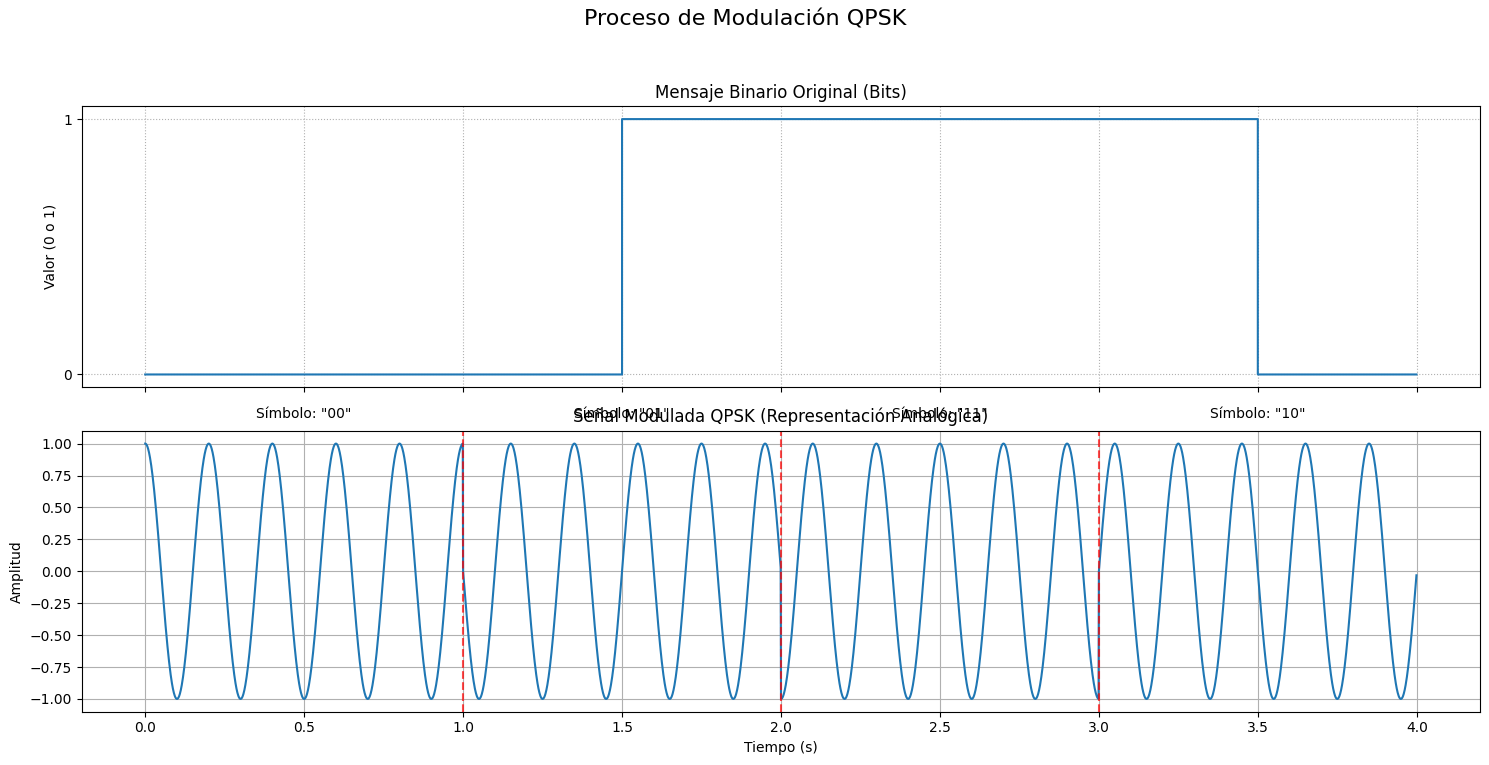

In [ ]:
# --- Mensaje y Simbolizaci√≥n ---
mensaje_binario = "00011110"
# Agrupamos el mensaje en s√≠mbolos de 2 bits
simbolos = [mensaje_binario[i:i+2] for i in range(0, len(mensaje_binario), 2)]

# --- Generaci√≥n de la Se√±al ---
t_total = np.linspace(0, len(simbolos) * t_simbolo, len(simbolos) * n_muestras_por_simbolo, endpoint=False)
senal_modulada = np.zeros_like(t_total)

for i, bits in enumerate(simbolos):
    fase = tabla_simbolos[bits]
    t_local = np.linspace(0, t_simbolo, n_muestras_por_simbolo, endpoint=False)
    # Creamos la onda para el s√≠mbolo actual
    onda = np.cos(2 * np.pi * f * t_local + fase)
    # La a√±adimos a la se√±al completa
    senal_modulada[i * n_muestras_por_simbolo:(i + 1) * n_muestras_por_simbolo] = onda

# --- Visualizaci√≥n Mejorada ---
fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=True)
fig.suptitle('Proceso de Modulaci√≥n QPSK', fontsize=16)

# 1. Gr√°fico de la se√±al digital (mensaje)
ax = axs[0]
bits_plot = np.array([int(b) for b in mensaje_binario for _ in range(int(fs * t_simbolo / 2))])
t_bits = np.linspace(0, len(simbolos) * t_simbolo, len(bits_plot), endpoint=False)
ax.plot(t_bits, bits_plot, drawstyle='steps-post')
ax.set_title("Mensaje Binario Original (Bits)")
ax.set_ylabel("Valor (0 o 1)")
ax.set_yticks([0, 1])
ax.grid(True, which='both', linestyle=':')

# 2. Gr√°fico de la se√±al modulada
ax = axs[1]
ax.plot(t_total, senal_modulada)
ax.set_title("Se√±al Modulada QPSK (Representaci√≥n Anal√≥gica)")
ax.set_xlabel("Tiempo (s)")
ax.set_ylabel("Amplitud")
ax.grid(True)

# A√±adir l√≠neas verticales para mostrar d√≥nde cambia el s√≠mbolo
for i in range(1, len(simbolos)):
    ax.axvline(x=i * t_simbolo, color='r', linestyle='--', alpha=0.7)
    # Anotar qu√© s√≠mbolo se est√° transmitiendo
    ax.text(i * t_simbolo - t_simbolo/2, 1.2, f'S√≠mbolo: "{simbolos[i-1]}"', ha='center', backgroundcolor='white')
ax.text(len(simbolos) * t_simbolo - t_simbolo/2, 1.2, f'S√≠mbolo: "{simbolos[-1]}"', ha='center', backgroundcolor='white')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**An√°lisis del Gr√°fico:** Observa c√≥mo la onda sinusoidal cambia su fase (su punto de inicio) cada segundo, justo donde las l√≠neas rojas marcan el cambio de s√≠mbolo. Por ejemplo, en $t=1$s, la fase cambia de 0¬∞ (para el s√≠mbolo "00") a 90¬∞ (para el s√≠mbolo "01"), lo que se manifiesta como un "salto" evidente en la forma de la onda.

## Parte 2. La Magia de Fourier: El Espectro de Frecuencia üïµÔ∏è‚Äç‚ôÇÔ∏è

Nuestra se√±al modulada parece compleja, pero el Teorema de Fourier nos dice que es solo una combinaci√≥n de senos y cosenos. La **Transformada R√°pida de Fourier (FFT)** es el algoritmo que nos permite ver exactamente qu√© "ingredientes" (frecuencias) componen nuestra se√±al.

Este es el puente directo entre la matem√°tica de la materia y el problema de ingenier√≠a.

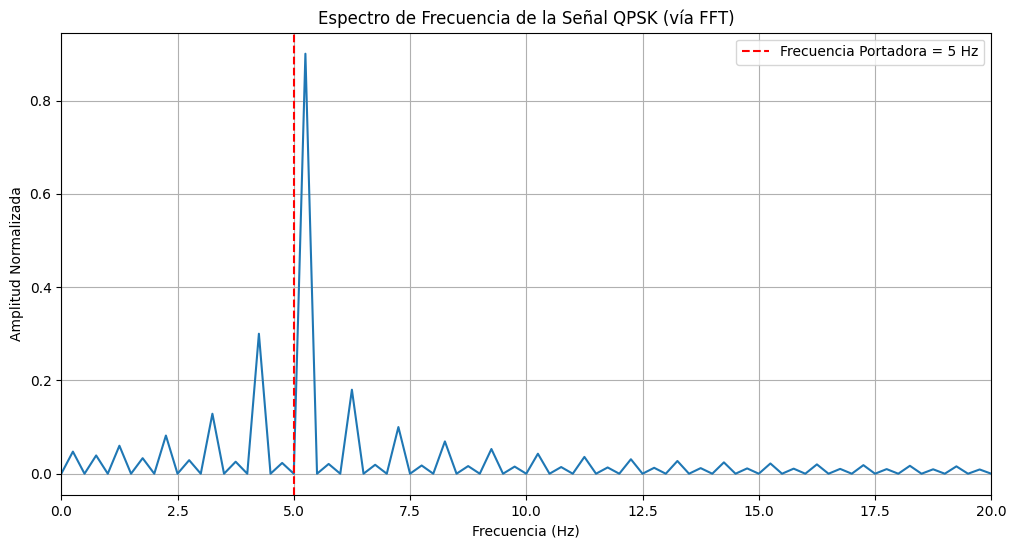

In [ ]:
# Calculamos la FFT de nuestra se√±al modulada
N = len(senal_modulada)
yf = fft(senal_modulada)
xf = fftfreq(N, 1/fs)[:N//2] # Tomamos las frecuencias positivas

# Graficamos el espectro de frecuencia
plt.figure(figsize=(12, 6))
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.title("Espectro de Frecuencia de la Se√±al QPSK (v√≠a FFT)")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud Normalizada")
plt.grid(True)
plt.axvline(x=f, color='r', linestyle='--', label=f'Frecuencia Portadora = {f} Hz')
plt.legend()
plt.xlim(0, 20)
plt.show()

**An√°lisis del Espectro:** ¬°Aqu√≠ est√° la conexi√≥n! El pico principal aparece exactamente en **5 Hz**, que es la frecuencia de nuestra onda portadora ($f$). Las peque√±as "jorobas" a su alrededor (llamadas l√≥bulos laterales) son introducidas por los cambios bruscos de fase; en esencia, **son la informaci√≥n** que hemos codificado en la se√±al.

En sistemas reales como OFDM (usado en 4G/5G y Wi-Fi), se usan miles de portadoras a la vez. La FFT es la herramienta que permite al receptor separarlas y leer la informaci√≥n de cada una.

## Parte 3. El Mundo Real: Ruido y Demodulaci√≥n

En la vida real, las se√±ales se corrompen con **ruido** (interferencias, otros dispositivos, etc.). Simularemos esto a√±adiendo ruido gaussiano a nuestra se√±al.

El reto del receptor (**demodulador**) es adivinar cu√°l era el mensaje original a partir de esta se√±al ruidosa.

### 3.1. Simulaci√≥n del Canal con Ruido

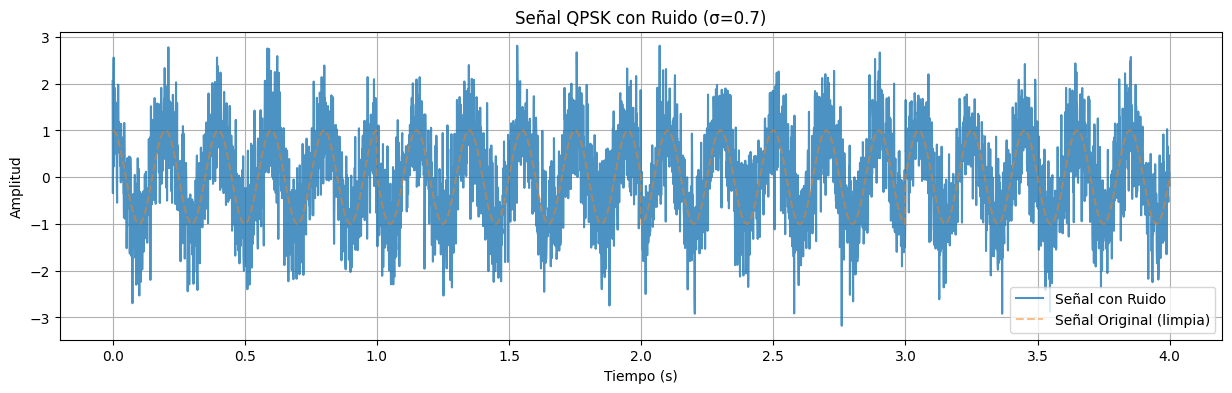

In [ ]:
# --- A√±adir Ruido Gaussiano ---
sigma = 0.7  # Desviaci√≥n est√°ndar del ruido (controla la intensidad)
ruido = np.random.normal(0, sigma, len(senal_modulada))
senal_con_ruido = senal_modulada + ruido

# --- Gr√°fico de la se√±al ruidosa ---
plt.figure(figsize=(15, 4))
plt.plot(t_total, senal_con_ruido, label='Se√±al con Ruido', alpha=0.8)
plt.plot(t_total, senal_modulada, label='Se√±al Original (limpia)', linestyle='--', alpha=0.5)
plt.title(f"Se√±al QPSK con Ruido (œÉ={sigma})")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

### 3.2. Demodulaci√≥n por Correlaci√≥n: La Proyecci√≥n de Fourier

¬øC√≥mo recuperamos los bits? Usamos una t√©cnica llamada **correlaci√≥n**. Es como "comparar" cada trozo de la se√±al ruidosa con las 4 ondas "perfectas" (plantillas) que representan a "00", "01", "11" y "10". La plantilla que m√°s se parezca es la que probablemente se envi√≥.

Matem√°ticamente, esta "comparaci√≥n" se hace con el **producto punto (dot product)**. Este proceso es, en esencia, calcular los coeficientes de Fourier: estamos **proyectando** nuestra se√±al recibida sobre las ondas base (nuestras plantillas) para ver cu√°l tiene la mayor contribuci√≥n.

In [ ]:
# --- Proceso de Demodulaci√≥n ---
bits_recuperados = ""
puntos_recibidos_I = [] # Para el diagrama de constelaci√≥n (componente En-Fase)
puntos_recibidos_Q = [] # Para el diagrama de constelaci√≥n (componente en Cuadratura)

# 1. Generamos las plantillas de referencia
plantillas = {}
t_local_demod = np.linspace(0, t_simbolo, n_muestras_por_simbolo, endpoint=False)
for bits, fase in tabla_simbolos.items():
    plantilla = np.cos(2 * np.pi * f * t_local_demod + fase)
    plantillas[bits] = plantilla

# 2. Segmentamos la se√±al y correlacionamos
for i in range(len(simbolos)):
    segmento = senal_con_ruido[i * n_muestras_por_simbolo:(i + 1) * n_muestras_por_simbolo]

    correlaciones = {bits: np.dot(segmento, p) for bits, p in plantillas.items()}

    # Proyectamos la se√±al en las bases I (cos) y Q (-sin) sin fase para la constelaci√≥n
    base_I = np.cos(2 * np.pi * f * t_local_demod)
    base_Q = -np.sin(2 * np.pi * f * t_local_demod)
    puntos_recibidos_I.append(np.dot(segmento, base_I))
    puntos_recibidos_Q.append(np.dot(segmento, base_Q))

    # 3. El s√≠mbolo con la correlaci√≥n m√°s alta es nuestra decisi√≥n
    mejor_ajuste = max(correlaciones, key=correlaciones.get)
    bits_recuperados += mejor_ajuste

# --- Resultados ---
errores = sum(1 for a, b in zip(mensaje_binario, bits_recuperados) if a != b)
ber = errores / len(mensaje_binario)

print("--- RESULTADOS DE LA DEMODULACI√ìN ---")
print(f"Mensaje original   : {mensaje_binario}")
print(f"Bits recuperados   : {bits_recuperados}")
print(f"Coinciden          : {mensaje_binario == bits_recuperados}")
print(f"Errores de bits    : {errores} de {len(mensaje_binario)}")
print(f"Tasa de error (BER): {ber:.3f}")

--- RESULTADOS DE LA DEMODULACI√ìN ---
Mensaje original   : 00011110
Bits recuperados   : 00011110
Coinciden          : True
Errores de bits    : 0 de 8
Tasa de error (BER): 0.000


## Parte 4. Visualizaci√≥n Avanzada: El Diagrama de Constelaci√≥n üåå

Esta es una de las herramientas visuales m√°s importantes en telecomunicaciones. Muestra en un plano 2D los "puntos" ideales de cada s√≠mbolo y d√≥nde aterrizaron los puntos recibidos despu√©s de ser afectados por el ruido. Cuanto m√°s se dispersen los puntos recibidos, mayor es el ruido y la probabilidad de error.

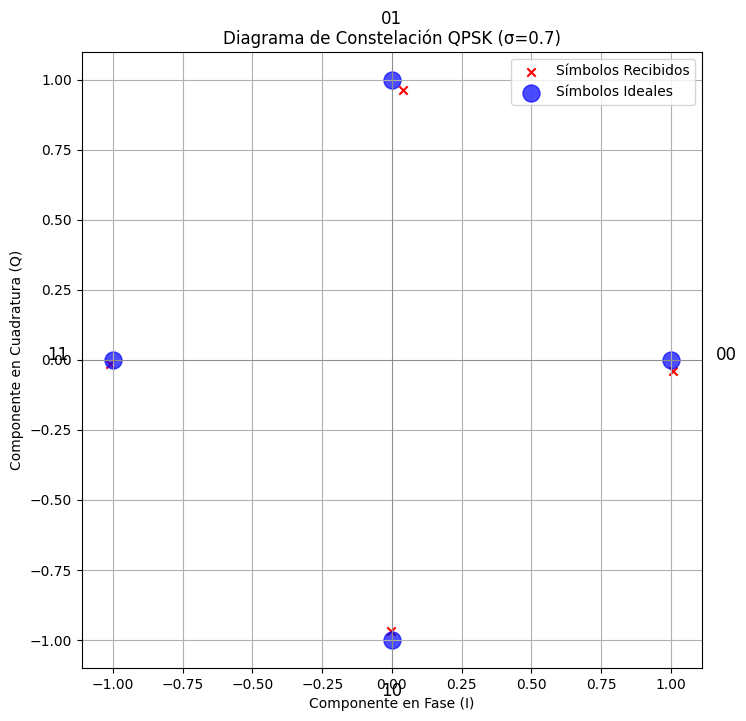

In [ ]:
# --- Puntos Ideales de la Constelaci√≥n ---
# Normalizamos por la energ√≠a del s√≠mbolo
energia_simbolo = np.sum(np.cos(2*np.pi*f*t_local_demod)**2)
puntos_ideales_x = [np.cos(fase) for fase in tabla_simbolos.values()]
puntos_ideales_y = [np.sin(fase) for fase in tabla_simbolos.values()]


# --- Gr√°fico de la Constelaci√≥n ---
plt.figure(figsize=(8, 8))
# Graficar puntos recibidos (normalizados)
rec_x = np.array(puntos_recibidos_I) / energia_simbolo
rec_y = -np.array(puntos_recibidos_Q) / energia_simbolo # el signo negativo es por la base -sin(wt)
plt.scatter(rec_x, rec_y, c='red', label='S√≠mbolos Recibidos', marker='x')

# Graficar puntos ideales
plt.scatter(puntos_ideales_x, puntos_ideales_y, s=150, c='blue', label='S√≠mbolos Ideales', marker='o', alpha=0.7)

# Etiquetas y estilo
for bits, pos in zip(tabla_simbolos.keys(), zip(puntos_ideales_x, puntos_ideales_y)):
    plt.text(pos[0] * 1.2, pos[1] * 1.2, bits, fontsize=12, ha='center')

plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.title(f"Diagrama de Constelaci√≥n QPSK (œÉ={sigma})")
plt.xlabel("Componente en Fase (I)")
plt.ylabel("Componente en Cuadratura (Q)")
plt.grid(True)
plt.axis('equal')
plt.legend()
plt.show()

**An√°lisis de la Constelaci√≥n:** Los puntos azules son las "metas" perfectas para cada s√≠mbolo. Los puntos rojos son los que recibimos, desplazados por el ruido. Mientras los puntos rojos est√©n m√°s cerca de su "meta" azul que de cualquier otra, el demodulador tomar√° la decisi√≥n correcta. Si el ruido es tan fuerte que un punto rojo cruza la frontera hacia otra zona, ocurrir√° un error de bit.

## Parte 5. TODO EN UNO!
Vamos empaquetando todo el proceso en una funci√≥n interactiva. Usa los deslizadores para cambiar la **frecuencia de la portadora** y el **nivel de ruido** y observa en tiempo real c√≥mo afectan a la se√±al, su espectro, la constelaci√≥n y la tasa de error (BER).

In [ ]:
def simulacion_qpsk_interactiva(f_portadora, sigma_ruido):
    # Par√°metros
    fs = 1000
    t_simbolo = 1.0
    n_muestras_por_simbolo = int(t_simbolo * fs)

    # Tabla de s√≠mbolos
    tabla_simbolos = { "00": 0, "01": np.pi/2, "11": np.pi, "10": 3*np.pi/2 }

    # Mensaje
    mensaje_binario = "0001111000111001"
    simbolos = [mensaje_binario[i:i+2] for i in range(0, len(mensaje_binario), 2)]

    # Modulaci√≥n
    t_total = np.linspace(0, len(simbolos) * t_simbolo, len(simbolos) * n_muestras_por_simbolo, endpoint=False)
    senal_modulada = np.zeros_like(t_total)
    for i, bits in enumerate(simbolos):
        onda = np.cos(2 * np.pi * f_portadora * np.linspace(0, t_simbolo, n_muestras_por_simbolo, endpoint=False) + tabla_simbolos[bits])
        senal_modulada[i*n_muestras_por_simbolo:(i+1)*n_muestras_por_simbolo] = onda

    # Canal con ruido
    ruido = np.random.normal(0, sigma_ruido, len(senal_modulada))
    senal_con_ruido = senal_modulada + ruido

    # Demodulaci√≥n
    bits_recuperados = ""
    puntos_recibidos_I, puntos_recibidos_Q = [], []
    t_local_demod = np.linspace(0, t_simbolo, n_muestras_por_simbolo, endpoint=False)
    plantillas = {bits: np.cos(2 * np.pi * f_portadora * t_local_demod + fase) for bits, fase in tabla_simbolos.items()}

    base_I = np.cos(2 * np.pi * f_portadora * t_local_demod)
    base_Q = -np.sin(2 * np.pi * f_portadora * t_local_demod)

    for i in range(len(simbolos)):
        segmento = senal_con_ruido[i*n_muestras_por_simbolo:(i+1)*n_muestras_por_simbolo]
        correlaciones = {bits: np.dot(segmento, p) for bits, p in plantillas.items()}
        puntos_recibidos_I.append(np.dot(segmento, base_I))
        puntos_recibidos_Q.append(np.dot(segmento, base_Q))
        bits_recuperados += max(correlaciones, key=correlaciones.get)

    errores = sum(1 for a, b in zip(mensaje_binario, bits_recuperados) if a != b)
    ber = errores / len(mensaje_binario)

    # --- Visualizaci√≥n ---
    fig, axs = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'f_portadora = {f_portadora} Hz, Ruido œÉ = {sigma_ruido:.2f}, BER = {ber:.3f}', fontsize=16)

    # Se√±al con Ruido
    axs[0, 0].plot(t_total, senal_con_ruido, alpha=0.8)
    axs[0, 0].set_title("Se√±al con Ruido")
    axs[0, 0].set_xlabel("Tiempo (s)")
    axs[0, 0].set_ylabel("Amplitud")
    axs[0, 0].grid(True)
    axs[0, 0].set_xlim(0, 4)

    # Espectro de Frecuencia
    N = len(senal_con_ruido)
    yf = fft(senal_con_ruido)
    xf = fftfreq(N, 1/fs)[:N//2]
    axs[0, 1].plot(xf, 2.0/N * np.abs(yf[0:N//2]))
    axs[0, 1].axvline(x=f_portadora, color='r', linestyle='--', label=f'Portadora')
    axs[0, 1].set_title("Espectro de Frecuencia (FFT)")
    axs[0, 1].set_xlabel("Frecuencia (Hz)")
    axs[0, 1].grid(True)
    axs[0, 1].set_xlim(0, f_portadora * 4)
    axs[0, 1].legend()

    # Diagrama de Constelaci√≥n
    energia_simbolo = np.sum(base_I**2)
    rec_x = np.array(puntos_recibidos_I) / energia_simbolo
    rec_y = np.array(puntos_recibidos_Q) / energia_simbolo
    axs[1, 0].scatter(rec_x, rec_y, c='red', marker='x', label='Recibidos')

    p_ideales_x = [np.cos(f) for f in tabla_simbolos.values()]
    p_ideales_y = [np.sin(f) for f in tabla_simbolos.values()]
    axs[1, 0].scatter(p_ideales_x, p_ideales_y, s=150, c='blue', marker='o', alpha=0.7, label='Ideales')

    axs[1, 0].set_title("Diagrama de Constelaci√≥n")
    axs[1, 0].set_xlabel("Componente I")
    axs[1, 0].set_ylabel("Componente Q")
    axs[1, 0].grid(True)
    axs[1, 0].axis('equal')
    axs[1, 0].legend()

    # Texto de Resultados
    axs[1, 1].axis('off')
    info_text = (f"Mensaje Original:   {mensaje_binario}\n"
                 f"Bits Recuperados:   {bits_recuperados}\n"
                 f"Coinciden:          {mensaje_binario == bits_recuperados}\n\n"
                 f"Errores de Bits:    {errores} de {len(mensaje_binario)}\n"
                 f"BER:                {ber:.3f}")
    axs[1, 1].text(0.05, 0.5, info_text, va='center', fontsize=12, fontfamily='monospace')

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# --- Crear y mostrar los widgets ---
style = {'description_width': 'initial'}
f_slider = widgets.FloatSlider(value=10, min=2, max=50, step=1, description='Frecuencia Portadora (Hz):', style=style)
sigma_slider = widgets.FloatSlider(value=0.5, min=0, max=2.0, step=0.05, description='Nivel de Ruido (œÉ):', style=style)

widgets.interactive(simulacion_qpsk_interactiva, f_portadora=f_slider, sigma_ruido=sigma_slider)

interactive(children=(FloatSlider(value=10.0, description='Frecuencia Portadora (Hz):', max=50.0, min=2.0, ste‚Ä¶

## Conclusiones

Hoy hemos viajado desde la abstracta f√≥rmula de una onda sinusoidal hasta la simulaci√≥n de un sistema de comunicaci√≥n digital. Hemos visto que:

1.  **Las Series de Fourier no son solo teor√≠a:** Las ondas seno y coseno son los "ladrillos" con los que construimos se√±ales complejas para transmitir datos. La modulaci√≥n es la aplicaci√≥n directa de esta idea.
2.  **La FFT es una herramienta de ingenier√≠a esencial:** Nos permiti√≥ "ver" el contenido de nuestra se√±al en el dominio de la frecuencia, identificando la portadora y la informaci√≥n. Es una herramienta de diagn√≥stico y dise√±o fundamental.
3.  **La demodulaci√≥n es una "proyecci√≥n de Fourier":** Al correlacionar la se√±al recibida con nuestras plantillas, est√°bamos, en efecto, calculando los coeficientes de Fourier para determinar qu√© "componente base" era el m√°s probable.

Este cuaderno es solo el comienzo. A partir de aqu√≠, se pueden explorar modulaciones m√°s complejas como QAM (variando tambi√©n la amplitud), el efecto de errores de sincronizaci√≥n, o el dise√±o de sistemas multiportadora como OFDM, donde la FFT no es solo una herramienta de an√°lisis, sino el motor principal del sistema.

Esperamos que esta demostraci√≥n pr√°ctica haya servido para motivar y clarificar la importancia del An√°lisis Matem√°tico en el mundo real de la Ingenier√≠a en Sistemas.